In [1]:
#import libarary

import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras import Input
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,LeakyReLU
from keras.layers import BatchNormalization

In [2]:
#load data
from keras.datasets import fashion_mnist

x_tr,x_tst,y_tr,y_tst=train_test_split(test_size=.20,random_shuffle=True,random_state=20)
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
#show columan and row
print('Training data shape : ', x_train.shape, y_train.shape)
print('Testing data shape : ', x_test.shape, y_test.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [4]:
# Find the unique numbers from the train labels

classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


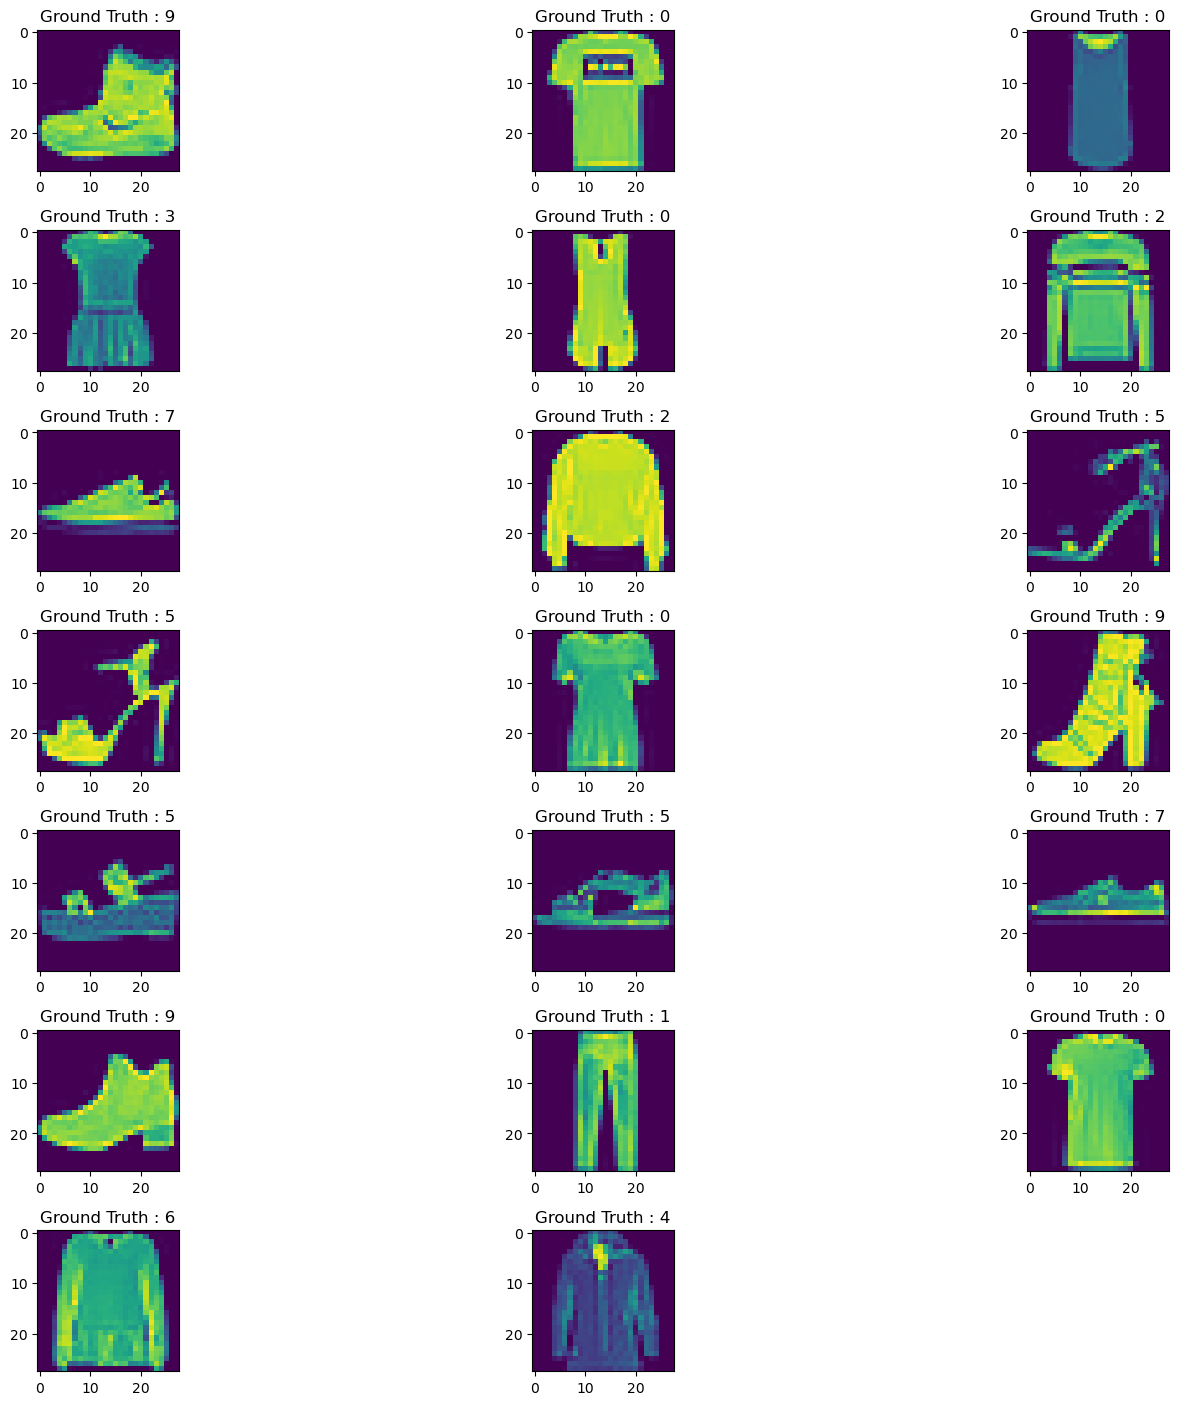

In [5]:
plt.figure(figsize=[15,200])
# import matplotlib.pyplot as plt
# Display the image in training data
for i in range(20):
    plt.subplot(100,3,i+1)
    plt.imshow(x_train[i])
    plt.title("Ground Truth : {}".format(y_train[i]))
plt.tight_layout()
# # Display the first image in testing data
# plt.subplot(122)
# plt.imshow(x_test[0,:,:], cmap='gray')
# plt.title("Ground Truth : {}".format(y_test[0]))

In [6]:
#reshpe image 
train_X = x_train.reshape(-1, 28,28, 1)
test_X = x_test.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
#convert float32
train_X = x_train.astype('float32')
test_X = test_X.astype('float32')
train_X = x_train / 255.
test_X = test_X / 255.

In [8]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(y_test)

# Display the change for category label using one-hot encoding
print('Original label:', y_train[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
#split data
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [10]:
#show shape
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28), (12000, 28, 28), (48000, 10), (12000, 10))

In [11]:
#define variable
batch_size = 64
epochs = 20
num_classes = 10

In [12]:
fashion_model = Sequential() #Conv2D() define as Convolutional Neural Networks
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same',name="Input"))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same',name="First_Hidden_Layer"))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same',name="Second_Hidden_Layer"))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same',name="Third_Hidden_Layer"))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same',name="Forth_Hidden_Layer"))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same',name="Fifth_Hidden_Layer"))
fashion_model.add(Flatten(name='flatten'))
fashion_model.add(Dense(128, activation='linear',name="Sixth_Hidden_Layer"))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax',name="Ouput"))

In [13]:
#Compile the Model

fashion_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [14]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Conv2D)              (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 First_Hidden_Layer (MaxPool  (None, 14, 14, 32)       0         
 ing2D)                                                          
                                                                 
 Second_Hidden_Layer (Conv2D  (None, 14, 14, 64)       18496     
 )                                                               
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 Third_Hidden_Layer (MaxPool  (None, 7, 7, 64)         0

In [15]:
#Train Model
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 57s 74ms/step - loss: 0.4657 - accuracy: 0.8287 - val_loss: 0.3234 - val_accuracy: 0.8800
Epoch 2/20
750/750 [==============================] - 47s 63ms/step - loss: 0.2863 - accuracy: 0.8967 - val_loss: 0.2701 - val_accuracy: 0.9003
Epoch 3/20
750/750 [==============================] - 47s 62ms/step - loss: 0.2408 - accuracy: 0.9121 - val_loss: 0.2521 - val_accuracy: 0.9071
Epoch 4/20
750/750 [==============================] - 46s 62ms/step - loss: 0.2074 - accuracy: 0.9244 - val_loss: 0.2407 - val_accuracy: 0.9127
Epoch 5/20
750/750 [==============================] - 46s 61ms/step - loss: 0.1827 - accuracy: 0.9333 - val_loss: 0.2214 - val_accuracy: 0.9199
Epoch 6/20
750/750 [==============================] - 45s 61ms/step - loss: 0.1593 - accuracy: 0.9401 - val_loss: 0.2524 - val_accuracy: 0.9133
Epoch 7/20
750/750 [==============================] - 45s 61ms/step - loss: 0.1383 - accuracy: 0.9482 - val_loss: 0.2205 - val_accuracy:

In [16]:
#Test Model
test_eval = fashion_model.evaluate(x_test, test_Y_one_hot, verbose=0)

In [17]:
#Model Evaluation on Test Model

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 132.99459838867188
Test accuracy: 0.8490999937057495


In [18]:
#Predict Labels
predicted_classes = fashion_model.predict(x_test)

313/313 [==============================] - 4s 11ms/step


In [19]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [20]:
predicted_classes.shape, y_test.shape

((10000,), (10000,))

Found 8491 correct labels


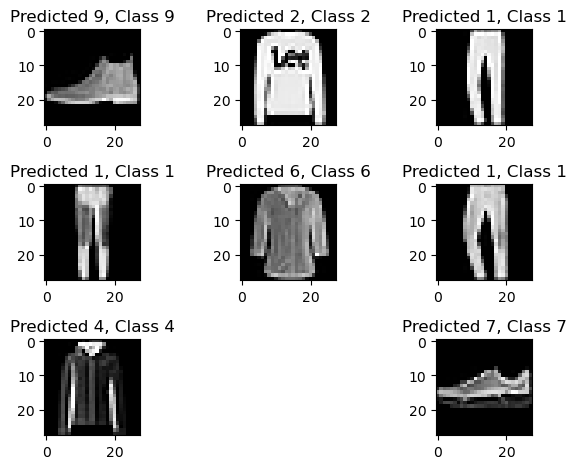

In [21]:
#plot correct labels
correct = np.where(predicted_classes==y_test)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()

Found 1509 incorrect labels


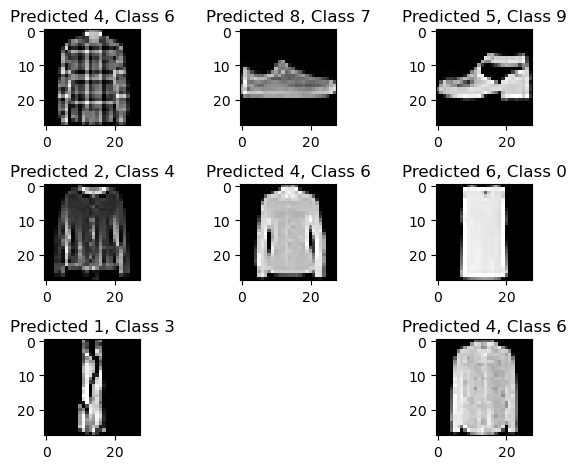

In [22]:
#in plot correct labels
incorrect = np.where(predicted_classes!=y_test)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.tight_layout()

In [23]:
#Classification Report
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.92      0.65      0.76      1000
     Class 1       0.95      0.99      0.97      1000
     Class 2       0.89      0.67      0.76      1000
     Class 3       0.92      0.76      0.83      1000
     Class 4       0.56      0.97      0.71      1000
     Class 5       0.96      0.97      0.97      1000
     Class 6       0.63      0.61      0.62      1000
     Class 7       0.95      0.95      0.95      1000
     Class 8       0.97      0.97      0.97      1000
     Class 9       0.97      0.94      0.96      1000

    accuracy                           0.85     10000
   macro avg       0.87      0.85      0.85     10000
weighted avg       0.87      0.85      0.85     10000

